In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/titanic_processed.csv')

In [3]:
df

,age,sibsp,parch,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_female,embarked_C,embarked_Q,embarked_S,survived
0,29.0000,0.0,0.0,211.3375,1,0,0,1,0,0,1,1
1,0.9167,1.0,2.0,151.5500,1,0,0,0,0,0,1,1
2,2.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
3,30.0000,1.0,2.0,151.5500,1,0,0,0,0,0,1,0
4,25.0000,1.0,2.0,151.5500,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,45.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1039,14.5000,1.0,0.0,14.4542,0,0,1,1,1,0,0,0
1040,26.5000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0
1041,27.0000,0.0,0.0,7.2250,0,0,1,0,1,0,0,0


## X,y 분리하기

In [4]:
X=df[df.columns[:-1]]

In [5]:
y=df['survived']

## 로지스틱회귀 학습

In [6]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [7]:
reg.fit(X,y)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 정확도 측정

In [18]:
y_pred=reg.predict(X)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [19]:
y_pred==y

0       False
1        True
2       False
3        True
4        True
        ...  
1038     True
1039     True
1040     True
1041     True
1042     True
Name: survived, Length: 1043, dtype: bool

In [21]:
import numpy as np

In [22]:
np.sum(y_pred==y)

622

In [23]:
np.sum(y_pred==y)/y.count()

0.5963566634707574

## 학습된 모형 예측

In [8]:
y_pred=reg.predict(X)

In [9]:
reg.predict_proba(X)

array([[0.07760797, 0.92239203],
       [0.30774838, 0.69225162],
       [0.03653536, 0.96346464],
       ...,
       [0.80269825, 0.19730175],
       [0.80570625, 0.19429375],
       [0.89374819, 0.10625181]])

## 학습된 계수 분석하기

In [10]:
reg.coef_

array([[-3.82068772e-02, -3.29779991e-01,  5.74165731e-02,
         3.29226394e-04,  1.04268288e+00, -6.71073636e-02,
        -9.92266410e-01,  2.50297787e+00,  6.18952202e-01,
        -6.23530838e-01, -1.21122600e-02]])

In [11]:
import matplotlib.pyplot as plt

In [12]:
reg.coef_

array([[-3.82068772e-02, -3.29779991e-01,  5.74165731e-02,
         3.29226394e-04,  1.04268288e+00, -6.71073636e-02,
        -9.92266410e-01,  2.50297787e+00,  6.18952202e-01,
        -6.23530838e-01, -1.21122600e-02]])

<BarContainer object of 11 artists>

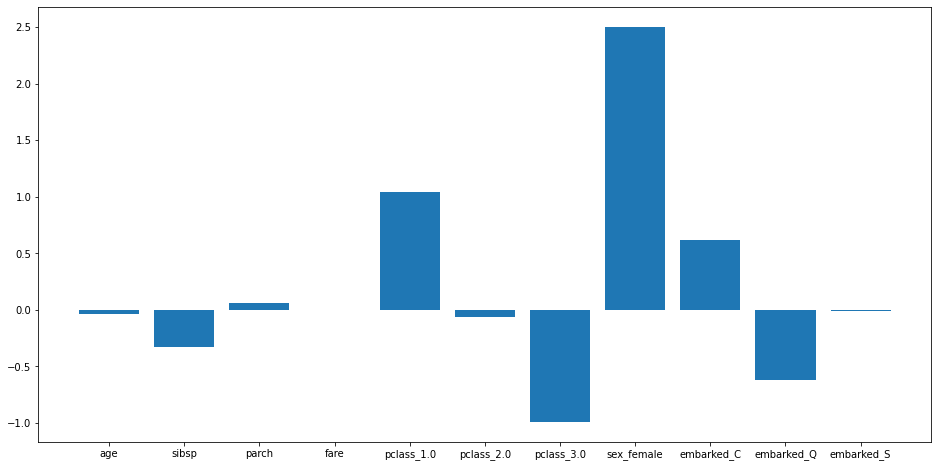

In [13]:
plt.figure(figsize=(16,8))
plt.bar(X.columns, reg.coef_[0])

## 데이터표준화

In [14]:
X_std = (X-X.mean())/X.std()

In [15]:
reg.fit(X_std,y)

LogisticRegression()

<BarContainer object of 11 artists>

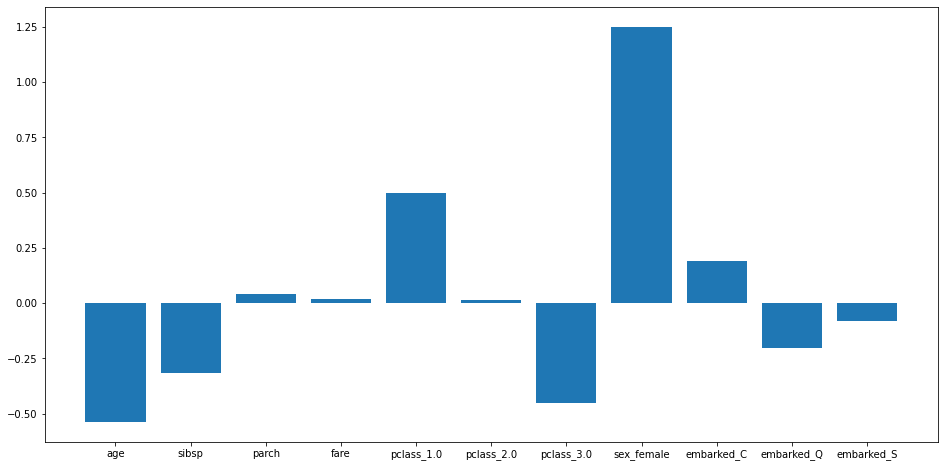

In [16]:
plt.figure(figsize=(16,8))
plt.bar(X.columns, reg.coef_[0])